In [ ]:
import pandas as pd
from google.colab import files
uploaded_file_1 = files.upload()



Saving twitter_training.csv to twitter_training.csv


In [ ]:
uploaded_file_2 = files.upload()

Saving twitter_validation.csv to twitter_validation.csv


In [ ]:
cols=['TweetID', 'Topic', 'Target', 'Text']
train=pd.read_csv('twitter_training.csv', names = cols)
valid=pd.read_csv('twitter_validation.csv', names = cols)

In [ ]:
train


,TweetID,Topic,Target,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
valid

,TweetID,Topic,Target,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df = pd.concat([train, valid], ignore_index = False)
df

,TweetID,Topic,Target,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.describe()

,TweetID
count,75682.000000
mean,6432.579583
std,3740.243463
min,1.000000
25%,3196.000000
50%,6423.000000
75%,9602.000000
max,13200.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75682 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TweetID  75682 non-null  int64 
 1   Topic    75682 non-null  object
 2   Target   75682 non-null  object
 3   Text     74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [ ]:
df['Topic'].unique()
df['Topic'].value_counts()

Topic
TomClancysRainbowSix                 2435
LeagueOfLegends                      2431
MaddenNFL                            2429
Microsoft                            2428
CallOfDuty                           2425
Verizon                              2414
ApexLegends                          2412
Facebook                             2403
CallOfDutyBlackopsColdWar            2403
WorldOfCraft                         2394
Dota2                                2391
FIFA                                 2378
NBA2K                                2373
Battlefield                          2372
TomClancysGhostRecon                 2368
johnson&johnson                      2367
Overwatch                            2366
Xbox(Xseries)                        2360
Amazon                               2350
PlayStation5(PS5)                    2343
GrandTheftAuto(GTA)                  2339
CS-GO                                2336
Cyberpunk2077                        2334
Nvidia                      

<Axes: xlabel='Topic'>

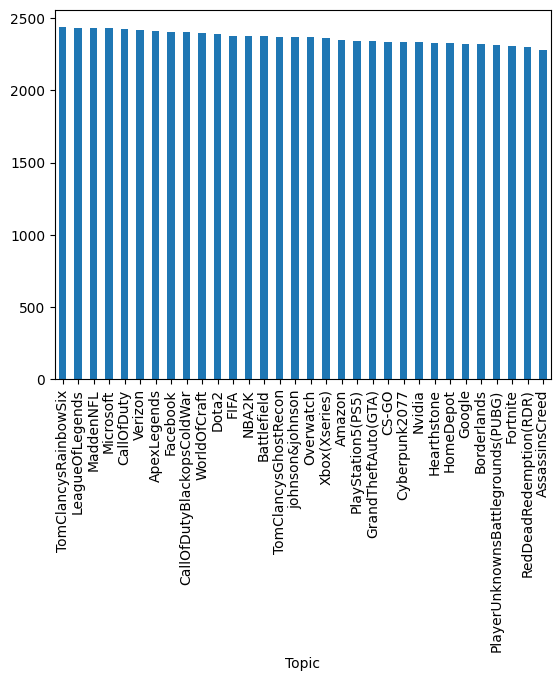

In [ ]:
df['Topic'].value_counts().plot(kind = 'bar')

In [ ]:
df.isnull().sum()

TweetID      0
Topic        0
Target       0
Text       686
dtype: int64

In [ ]:
df.duplicated().sum()

3217

In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.isnull().sum()
df.duplicated().sum()

0

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='Target', ylabel='Topic'>

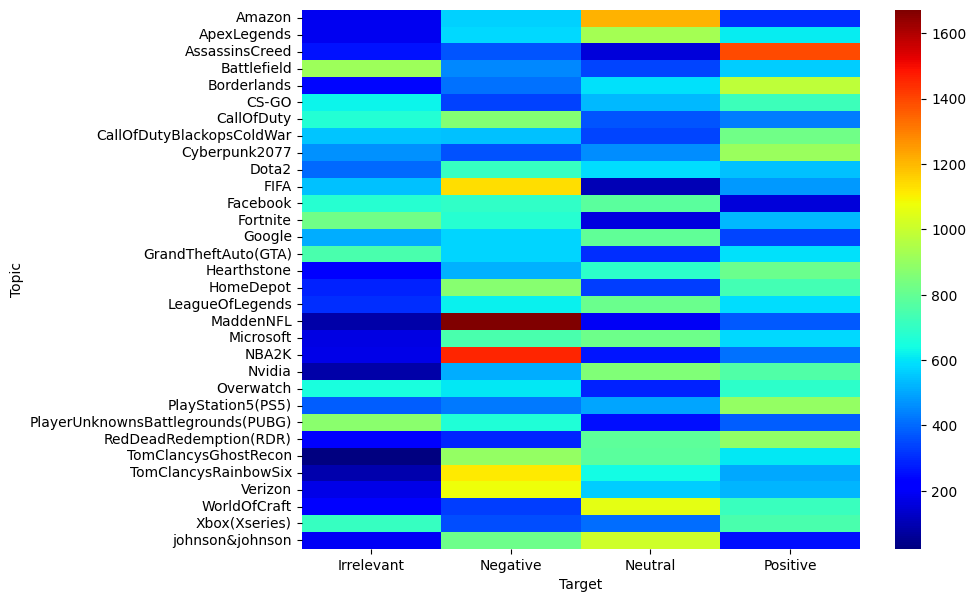

In [ ]:
plt.figure(figsize=(9, 7))
crosstab = pd.crosstab(index=df['Topic'], columns=df['Target'])
sns.heatmap(crosstab, cmap = 'jet')

In [ ]:
crosstab

Target,Irrelevant,Negative,Neutral,Positive
Topic,,,,
Amazon,188,566,1210,306
ApexLegends,188,577,927,613
AssassinsCreed,257,366,155,1393
Battlefield,912,449,345,563
Borderlands,239,415,590,978
CS-GO,624,335,530,721
CallOfDuty,668,865,370,430
CallOfDutyBlackopsColdWar,548,542,343,823
Cyberpunk2077,462,361,458,908


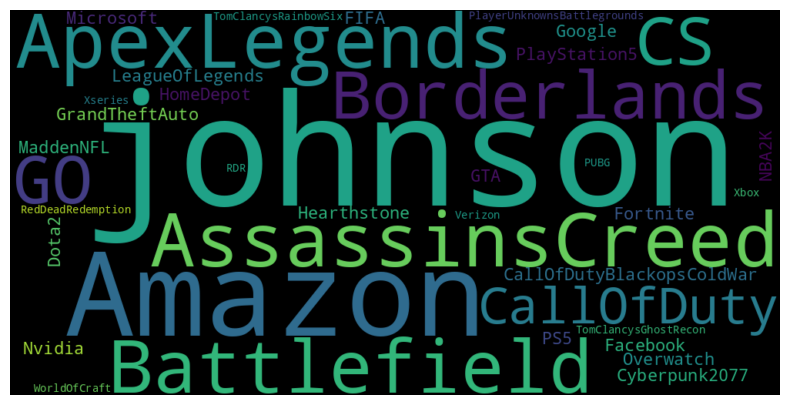

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
topic_list = ' '.join(crosstab.index)  # Assuming crosstab is your DataFrame or Series containing topics
wc = WordCloud(width=1000, height=500).generate(topic_list)

plt.figure(figsize=(10, 5))  # Adjusting figure size for better display
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Turning off axis labels
plt.show()


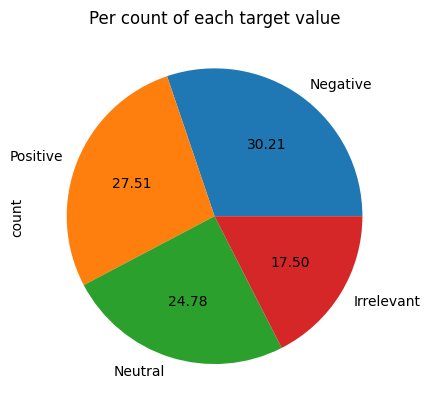

In [ ]:
df['Target'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title("Per count of each target value")
plt.show()

<ipython-input-39-fb2c9f71b21f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=target_count,x='Target',y='count',palette='cubehelix')


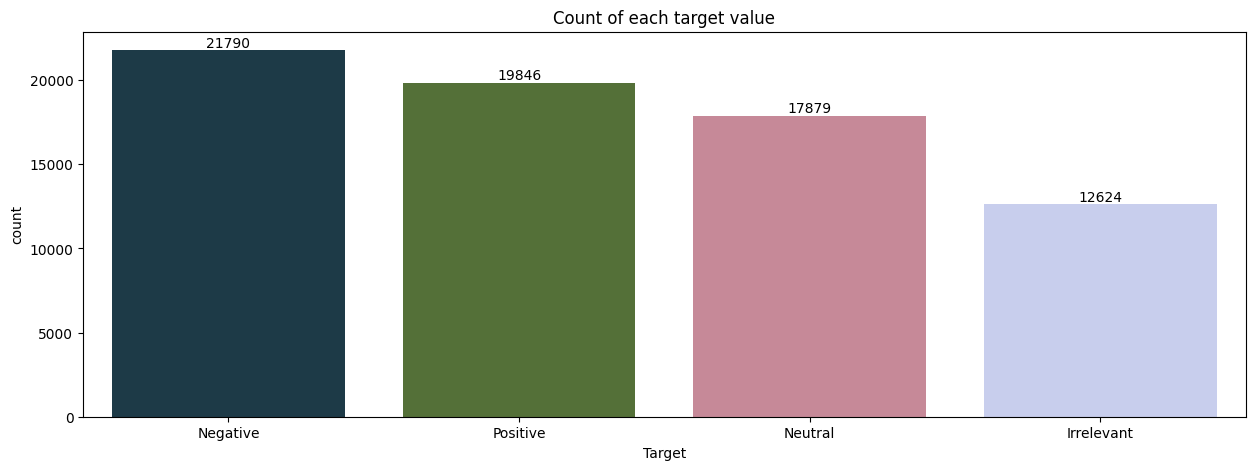

In [ ]:
target_count = df['Target'].value_counts().reset_index()
target_count
plt.figure(figsize=(15,5))
ax = sns.barplot(data=target_count,x='Target',y='count',palette='cubehelix')
for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Count of each target value")
plt.show()

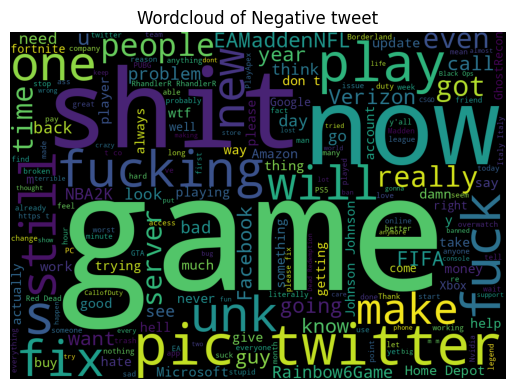

In [ ]:
wc = WordCloud(width=1000,height=700,min_font_size=10,background_color='black')
negative = wc.generate(df[df['Target']=='Negative']['Text'].str.cat(sep=" "))
plt.title('Wordcloud of Negative tweet')
plt.axis('off')
plt.imshow(negative)
plt.show()

In [ ]:
df['sentiment'] = df['Target'].replace({'Positive':1,'Negative':0,'Neutral':2,'Irrelevant':3})

In [ ]:
df

,TweetID,Topic,Target,Text,sentiment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,1
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,1
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,1
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,1
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,1
...,...,...,...,...,...
988,7516,LeagueOfLegends,Neutral,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...,2
989,5708,HomeDepot,Positive,Thank you to Matching funds Home Depot RW paym...,1
991,2165,CallOfDuty,Neutral,Late night stream with the boys! Come watch so...,2
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,3


In [ ]:
!pip install nltk
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
l = []
text = df['Text']

for t in text:
    if type(t) not in l:
        l.append(type(t))
print(l)

[<class 'str'>]


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import re
nltk.download('punkt')

modified_text = []

rows = len(text)

for ithText in df['Text']:

    ithText = ithText.lower()
    ithText = re.sub(r'[^\w\s]', '', ithText)
    ithText = re.sub(r'\d+', '', ithText)
    tokens = word_tokenize(ithText)
    words = set(stopwords.words('english'))
    doc = [word for word in tokens if word not in words]
    finalText = ' '.join(doc)
    modified_text.append(finalText)

print(modified_text[1:3])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['coming borders kill', 'im getting borderlands kill']


In [ ]:
from sklearn.model_selection import train_test_split

X = df['Text']
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))